<h1 align="center">Titanic Survival Prediction</h1> 
<h4 align='center'>using Random Forest Classifier</h4>
<h4 align='center'>Achieved a Accuracy Score of 0.78468 (TOP 12%)</h4>
<div style="text-align: right">created<br>
-- by <a href="https://github.com/daanyal011" target="_blank"><b>Daanyal Parbulkar</b></a><br>
--<a href="https://www.linkedin.com/in/daanyal-parbulkar-02a764228/" target="_blank"><b>Add me on Linkedin</b></a> 

--- 


#### loading the recquired libraries

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler 

#### loading the training datset 

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/daanyal011/Titanic-survival-prediction-/main/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### loading the test data set 

In [ ]:
df_test = pd.read_csv('https://raw.githubusercontent.com/daanyal011/Titanic-survival-prediction-/main/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
mean = int(df_train['Age'].mean())
mean

29

In [ ]:
df_train['Age'].fillna(mean,inplace=True)

In [ ]:
df_train['Sex'] = df_train['Sex'].map({'male':1,'female':0})
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# df_train[df_train['Embarked'].isnull()]

In [ ]:
d = pd.get_dummies(df_train['Embarked'])

In [ ]:
df_train1 = pd.concat([df_train,d],axis=1)


In [ ]:
df_train1.drop('Embarked',inplace=True,axis=1)

In [ ]:
df_train1.rename(columns = {'C':'Cherbourg','Q':'Queenstown','S':'Southampton'},inplace = True)
# Q = Queenstown, S = Southampton

In [ ]:
df_train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Cherbourg,Queenstown,Southampton
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1


In [ ]:
df_train1.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [ ]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cherbourg    891 non-null    uint8  
 9   Queenstown   891 non-null    uint8  
 10  Southampton  891 non-null    uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 58.4 KB


In [ ]:
df_train1.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cherbourg,Queenstown,Southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.560236,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783
std,257.353842,0.486592,0.836071,0.477990,13.005010,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [ ]:
df_train1.to_csv('train_cleaned.csv',index=False)

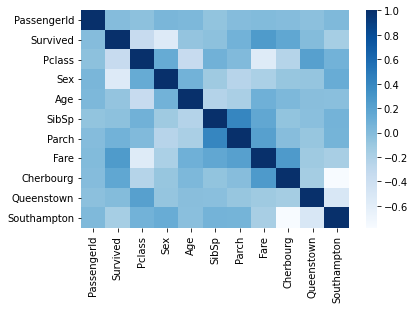

In [ ]:
import seaborn as sns
sns.heatmap(df_train1.corr(),cmap='Blues')
plt.show()

In [ ]:
X1 = df_train1.drop(['Survived'],axis=1).copy()
Y1 = df_train1['Survived']

In [ ]:
X1.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cherbourg,Queenstown,Southampton
0,1,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,0,38.0,1,0,71.2833,1,0,0
2,3,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,0,35.0,1,0,53.1000,0,0,1
4,5,3,1,35.0,0,0,8.0500,0,0,1


In [ ]:
Y1.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X1).transform(X1)
X[0:5]

array([[-1.73010796,  0.82737724,  0.73769513, -0.58165904,  0.43279337,
        -0.47367361, -0.50244517, -0.48204268, -0.30756234,  0.61930636],
       [-1.72622007, -1.56610693, -1.35557354,  0.64932701,  0.43279337,
        -0.47367361,  0.78684529,  2.0745051 , -0.30756234, -1.61470971],
       [-1.72233219,  0.82737724, -1.35557354, -0.27391253, -0.4745452 ,
        -0.47367361, -0.48885426, -0.48204268, -0.30756234,  0.61930636],
       [-1.71844431, -1.56610693, -1.35557354,  0.41851712,  0.43279337,
        -0.47367361,  0.42073024, -0.48204268, -0.30756234,  0.61930636],
       [-1.71455642,  0.82737724,  0.73769513,  0.41851712, -0.4745452 ,
        -0.47367361, -0.48633742, -0.48204268, -0.30756234,  0.61930636]])

In [ ]:
Y = Y1

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
X_train

array([[ 0.24882452,  0.82737724,  0.73769513, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [-1.55515322,  0.82737724,  0.73769513, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [-0.51708845, -0.36936484, -1.35557354, ..., -0.48204268,
        -0.30756234,  0.61930636],
       ...,
       [ 0.09719708,  0.82737724,  0.73769513, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [ 1.10415879,  0.82737724, -1.35557354, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [ 0.90198887,  0.82737724, -1.35557354, ..., -0.48204268,
        -0.30756234,  0.61930636]])

In [ ]:
print(type(Y_train))
print(type(X_train))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [ ]:
accuracy = []
K=10
for fold in range(0, K):

  # Instantiate algorithm
  model = RandomForestClassifier()
  # scaler = StandardScaler()

  # Create training and test samples
  # X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=42)

  # Scale X data, we scale the data because it helps the algorithm to converge
  # and helps the algorithm to not be greedy with large values
  # scaler.fit(X_train)
  # X_train = scaler.transform(X_train)
  # X_test = scaler.transform(X_test)

  # Train model
  trained_model = model.fit(X_train, Y_train)

  # Generate predictions on test sample
  y_pred = trained_model.predict(X_test)

  # Compute accuracy, using mean absolute error
  mae = mean_absolute_error(y_true=Y_test, y_pred=y_pred)
  accuracy.append(mae)
  print(f"Fold {fold + 1}: MAE = {mae:.3f}")

print(f"Average MAE: {(sum(accuracy) / len(accuracy)):.2f}")

Fold 1: MAE = 0.201
Fold 2: MAE = 0.196
Fold 3: MAE = 0.196
Fold 4: MAE = 0.190
Fold 5: MAE = 0.196
Fold 6: MAE = 0.179
Fold 7: MAE = 0.201
Fold 8: MAE = 0.201
Fold 9: MAE = 0.184
Fold 10: MAE = 0.201
Average MAE: 0.19


In [ ]:
print("Training Score: ",accuracy_score(Y_train,trained_model.predict(X_train)))
print("Testing Score: ",accuracy_score(Y_test,y_pred))

Training Score:  1.0
Testing Score:  0.7988826815642458


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfg = RandomForestClassifier()
rfg.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
yhat = rfg.predict(X_test)
yhat[0:5]

array([0, 0, 1, 0, 0])

In [ ]:
# This is without numpy array but with passenger ID
from sklearn.metrics import accuracy_score
print("Training Score: ",accuracy_score(Y_train,rfg.predict(X_train)))
print("Testing Score: ",accuracy_score(Y_test,yhat))

Training Score:  1.0
Testing Score:  0.8156424581005587


In [ ]:
df_test = pd.read_csv('https://raw.githubusercontent.com/daanyal011/Titanic-survival-prediction-/main/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
mean = int(df_test['Age'].mean())
mean

30

In [ ]:
df_test['Age'].fillna(mean,inplace=True)

In [ ]:
df_test['Sex'] = df_test['Sex'].map({'male':1,'female':0})

In [ ]:
d = pd.get_dummies(df_test['Embarked'])

In [ ]:
df_test1 = pd.concat([df_test,d],axis=1)

In [ ]:
df_test1.drop('Embarked',inplace=True,axis=1)

In [ ]:
df_test1.rename(columns = {'C':'Cherbourg','Q':'Queenstown','S':'Southampton'},inplace = True)

In [ ]:
df_test1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Cherbourg,Queenstown,Southampton
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,0,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0,0,1


In [ ]:
df_test1.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [ ]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Cherbourg    418 non-null    uint8  
 8   Queenstown   418 non-null    uint8  
 9   Southampton  418 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 24.2 KB


In [ ]:
df_test1['Fare'].fillna(method="ffill",inplace=True)

In [ ]:
df_test1.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cherbourg,Queenstown,Southampton
0,892,3,1,34.5,0,0,7.8292,0,1,0
1,893,3,0,47.0,1,0,7.0000,0,0,1
2,894,2,1,62.0,0,0,9.6875,0,1,0
3,895,3,1,27.0,0,0,8.6625,0,0,1
4,896,3,0,22.0,1,1,12.2875,0,0,1


In [ ]:
Xd = StandardScaler().fit(df_test1).transform(df_test1)
Xd[0:5]

array([[-1.72791209,  0.87348191,  0.75592895,  0.33942386, -0.49947002,
        -0.4002477 , -0.49707093, -0.56814154,  2.84375747, -1.35067551],
       [-1.71962474,  0.87348191, -1.32287566,  1.32992353,  0.61699237,
        -0.4002477 , -0.51193378, -0.56814154, -0.35164743,  0.74037028],
       [-1.71133739, -0.31581919,  0.75592895,  2.51852314, -0.49947002,
        -0.4002477 , -0.46376216, -0.56814154,  2.84375747, -1.35067551],
       [-1.70305005,  0.87348191,  0.75592895, -0.25487594, -0.49947002,
        -0.4002477 , -0.48213459, -0.56814154, -0.35164743,  0.74037028],
       [-1.6947627 ,  0.87348191, -1.32287566, -0.65107581,  0.61699237,
         0.61989583, -0.41715893, -0.56814154, -0.35164743,  0.74037028]])

In [ ]:
yhat1 = trained_model.predict(Xd)


In [ ]:
yhat1[0:5]

array([0, 0, 0, 0, 1])

In [ ]:
yhat1.shape

(418,)

In [ ]:
final_df = df_test1[['PassengerId']]

In [ ]:
final_df['Survived'] = yhat1

<ipython-input-156-b8ae20e87d82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Survived'] = yhat1


In [ ]:
final_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
df_sub = pd.read_csv('https://raw.githubusercontent.com/daanyal011/Titanic-survival-prediction-/main/gender_submission.csv')
df_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
final_df.to_csv('Submission.csv',index=False)